In [1]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

# Loading "Go To College Dataset" from kaggle.com. The dataset can be found by clicking the link: 
# https://www.kaggle.com/datasets/saddamazyazy/go-to-college-dataset
df = pd.read_csv('data.csv')

In [2]:
# Encoding categorical variables - just like in Project 1

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,0]=le.fit_transform(df.iloc[:,0])
df.iloc[:,1]=le.fit_transform(df.iloc[:,1])
df.iloc[:,2]=le.fit_transform(df.iloc[:,2])
df.iloc[:,3]=le.fit_transform(df.iloc[:,3])
df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
df.iloc[:,9]=le.fit_transform(df.iloc[:,9])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])

In [3]:
# Splitting data into X and Y

y = df['in_college']
X = df.drop(['in_college'],axis=1)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Scaling X data

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_trans = scaler.fit_transform(X)

# split data and labels into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, stratify = y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 10), (800,), (200, 10), (200,))

Text(0, 0.5, 'Feature magnitude')

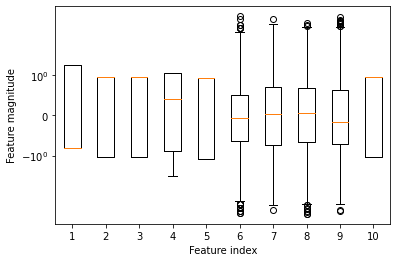

In [5]:
# Box plots to check scaling of X
%matplotlib inline
import matplotlib.pyplot as plt
plt.boxplot(X_trans)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023868BCFE80>,
      dtype=object)

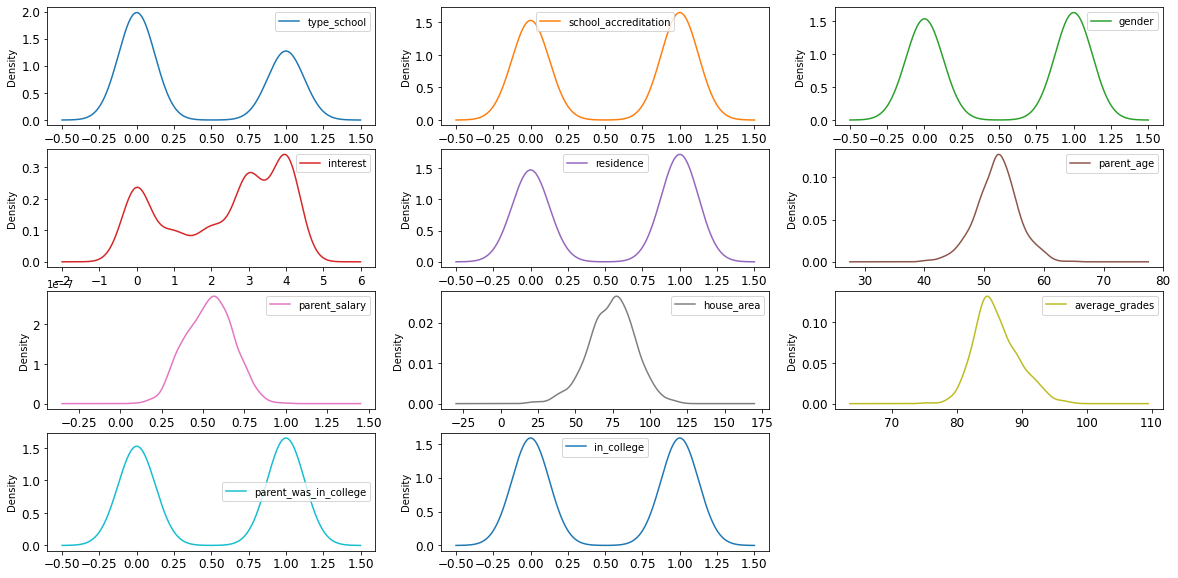

In [6]:
# Density plots - continoues variables are nearly normally distributed.

df.plot(kind='density', subplots=True, layout=(4,3), sharex=False, 
                     sharey=False,fontsize=12, figsize=(20,10))

In [7]:
# K Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [8]:
# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.91


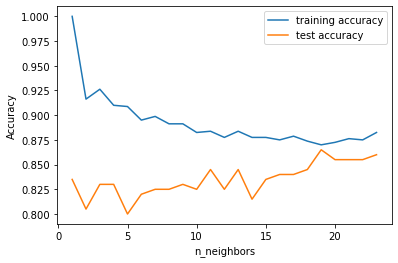

In [22]:
# Comparing different values for k

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 24)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

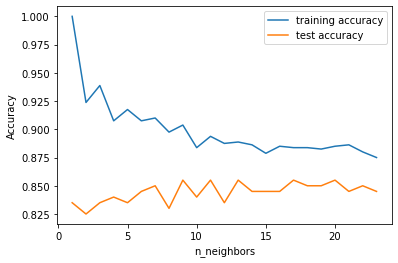

In [21]:
# Manhattan Distance

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 24)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [23]:
# Cross Validation

from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)

print("cv_scores:\n{}".format(cv_scores))
print("cv_scores mean:\n{}".format(np.mean(cv_scores)))

cv_scores:
[0.85625 0.8125  0.79375 0.90625 0.8375 ]
cv_scores mean:
0.8412499999999999


In [16]:
# Grid Search

from sklearn.model_selection import GridSearchCV

knn2 = KNeighborsClassifier()

#dictionary of all values of k
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [17]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 21}

In [18]:
#accuracy of best performing k
knn_gscv.best_score_

0.8625

In [19]:
# accuracy of k = 4 on testing data 
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.83


In [20]:
# accuracy of k = 21 on testing data 
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_test, y_test)))

knn score: 0.855


In [24]:
# Metrics other than accuracy

knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn4.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[94  6]
 [28 72]]


In [25]:
knn21 = KNeighborsClassifier(n_neighbors=21)
knn21.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, knn21.predict(X_test))
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[92  8]
 [21 79]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn4.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.77      0.94      0.85       100
     class 2       0.92      0.72      0.81       100

    accuracy                           0.83       200
   macro avg       0.85      0.83      0.83       200
weighted avg       0.85      0.83      0.83       200



In [28]:
print(classification_report(y_test, knn21.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.81      0.92      0.86       100
     class 2       0.91      0.79      0.84       100

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



In [29]:
# Support Vector Machines
# X_train and X_test were already scaled for Project 1

from sklearn.svm import SVC

# polynomial kernel
svmPoly1 = SVC(kernel='poly', C=10).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmPoly1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPoly1.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.87


In [40]:
print(classification_report(y_test, svmPoly1.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.85      0.90      0.87       100
     class 2       0.89      0.84      0.87       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [30]:
# radial basis function kernel
svmRBF1 = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF1.score(X_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.88


In [41]:
print(classification_report(y_test, svmRBF1.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.87      0.90      0.88       100
     class 2       0.90      0.86      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [31]:
# Parameter Tuning
# constrained model (low C and low gamma)
svmRBF2 = SVC(kernel='rbf', C=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF2.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF2.score(X_test, y_test)))

Accuracy on training set: 0.89
Accuracy on test set: 0.86


In [42]:
print(classification_report(y_test, svmRBF2.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.83      0.92      0.87       100
     class 2       0.91      0.81      0.86       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200



In [32]:
# constrained model (low C and low gamma)
svmRBF3 = SVC(kernel='rbf', C=1000, gamma=10).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBF3.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBF3.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


In [43]:
print(classification_report(y_test, svmRBF3.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.82      0.33      0.47       100
     class 2       0.58      0.93      0.72       100

    accuracy                           0.63       200
   macro avg       0.70      0.63      0.59       200
weighted avg       0.70      0.63      0.59       200



In [33]:
# Balanced Cross-Validation Split and Grid Search
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [34]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

In [35]:
# polynomial kernel
gridPoly = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
gridPoly.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridPoly.best_params_, gridPoly.best_score_))

The best parameters are {'C': 10.0, 'gamma': 0.1} with a score of 0.86


In [36]:
# polynomial kernel
svmPolyGrid = SVC(kernel='poly', C=10.0, gamma=0.1).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmPolyGrid.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmPolyGrid.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.87


In [44]:
print(classification_report(y_test, svmPolyGrid.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.85      0.90      0.87       100
     class 2       0.89      0.84      0.87       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



In [38]:
#rbf kernel
gridRBF = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
gridRBF.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (gridRBF.best_params_, gridRBF.best_score_))

The best parameters are {'C': 10000.0, 'gamma': 0.001} with a score of 0.91


In [39]:
svmRBFgrid = SVC(kernel='rbf', C=10000.0, gamma=0.001).fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svmRBFgrid.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svmRBFgrid.score(X_test, y_test)))

Accuracy on training set: 0.93
Accuracy on test set: 0.87


In [46]:
print(classification_report(y_test, svmRBFgrid.predict(X_test),
                            target_names=["class 1", "class 2"]))

              precision    recall  f1-score   support

     class 1       0.84      0.91      0.87       100
     class 2       0.90      0.83      0.86       100

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200

